<a href="https://colab.research.google.com/github/stutkhd/excercise_logistics/blob/master/%E5%B1%80%E6%89%80%E6%8E%A2%E7%B4%A2%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8, 9, 10回. コンペティション用プログラム作成

## 1. 都市集合C
### 1.1 ベンチマーク問題例TSPLIBを使う場合

In [1]:
def strnum_to_num(t):
    num=t.split("e+")
    r=float(num[0])
    if len(num)==2:
        r *= 10**int(num[1])
    return r

def read_tsp_file(instance):
    if instance[:4]=="http":
        import urllib.request
        with urllib.request.urlopen(instance) as f:
            with open('tmp.txt', 'w') as g:
                print(f.read().decode(), file=g)
                instance="tmp.txt"
        
    with open(instance,"r") as f:
        for i in range(6):
            line=f.readline().rstrip("\n")        
        C={}
        for line in f.readlines():
            node=line.rstrip("\n").split()
            name=node[0]            
            if name == "EOF":
                break
            if node[0]=='NODE_COORD_SECTION':
                continue
            x,y=strnum_to_num(node[1]),strnum_to_num(node[2])
            C[name]=(x,y)
        return C
    
instance="http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/ch130.tsp"
C=read_tsp_file(instance)

### 1.2 ランダムなデータを使う場合

In [2]:
C={}
n=10
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)

## 2. distanceとgraph_of_tourの定義

In [3]:
def distance(pa,pb):
    return ((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)**0.5

import networkx as nx

def graph_of_tour(tour):
    Gt=nx.Graph()

    for i in range(len(tour)):
        ci=tour[i]
        if i == len(tour)-1:
            cj=tour[0]
        else:
            cj=tour[i+1]        
        Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
    return Gt

## 3. アルゴリズム

提出してもらったみなさんのプログラムはtsp_solveから実行します．制限時間で止まるようしておいてください．

In [6]:
import time

def better_solution(sol):
    n = len(sol) #都市の数
    # print(sol)
    #反転させる
    for i in range(n):
        for length in range(2, n):
            #一番最後はいらないので削除
            if i+length-1 > n-1:
                break
            path = sol[i:i+length] #reverseしたいpath
            diff = -distance(C[sol[i-1]], C[sol[i]]) - distance(C[sol[i+length-1]], C[sol[(i+length)%n]])+distance(C[sol[i-1]], C[sol[i+length-1]])+ distance(C[sol[i]], C[sol[(i+length)%n]])
            if diff < -0.0000001: #数値誤差の関係で0ではない
                path.reverse()
                bsol = sol[:i] + path + sol[i+length:]
                return bsol
    return None

def local_search(init_sol):
    sol = init_sol #現在の解を表す
    #近傍を見て改善解があれば改善する
    while True:
        bsol = better_solution(sol) #改善する
        if bsol == None:
            return sol
        else:
            sol = bsol

    return None

def tsp_solve(C,timelimit=500):
    ''' TSPを解くためのプログラム
    input: 都市集合C, 制限時間timelimit(秒)
    output: 巡回路
    '''

    tour = [i for i in range(len(C))]
    starttime=time.time()
    while time.time() - starttime < timelimit:
        tour = local_search(tour)
    return tour

tour=tsp_solve(C,3)

## 4. 解tourの描画と実行可能性

size of tour: 26916.40813636071
feasibility: True


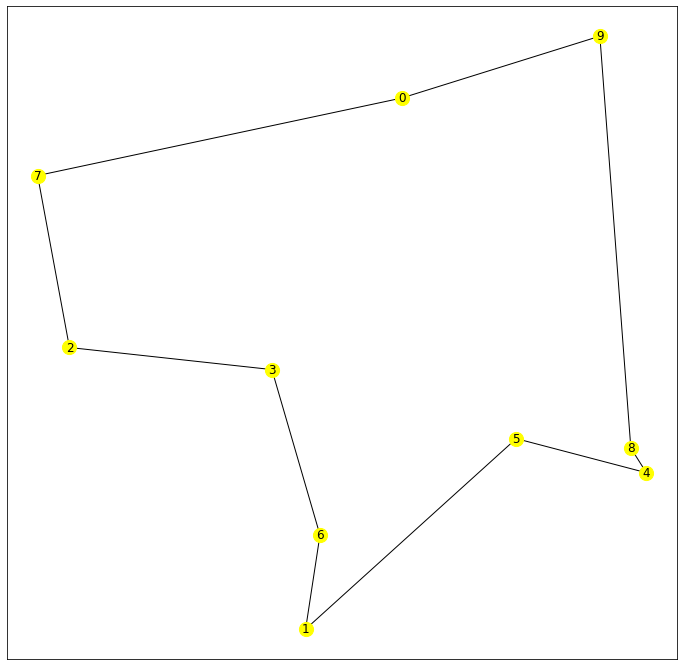

In [7]:
Gt=graph_of_tour(tour)
print('size of tour:', Gt.size(weight='weight'))
print('feasibility:',nx.is_k_edge_connected(Gt,2))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw_networkx(Gt,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1,axis="equal")
plt.show() 